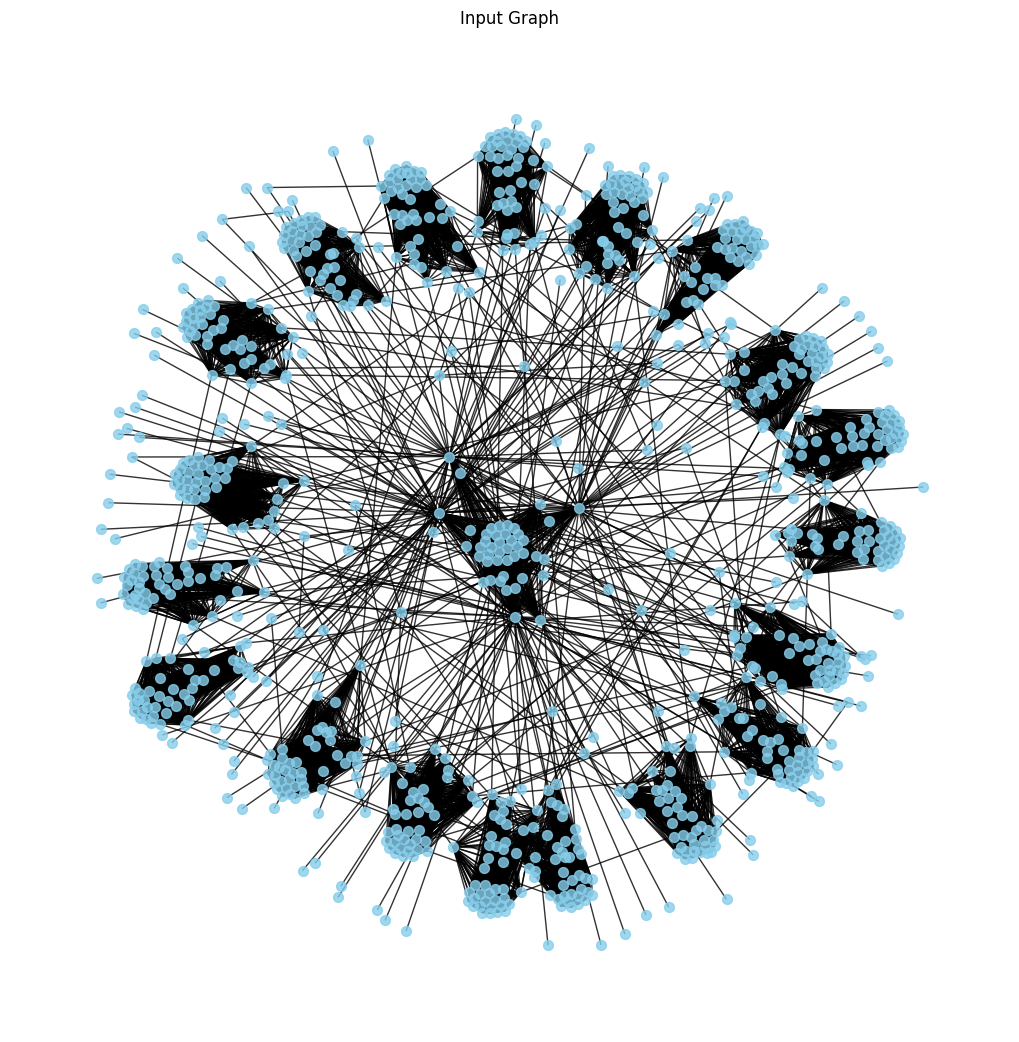

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_diverse_social_network(total_nodes=1000, num_clusters=20, cluster_size=40, min_periphery=40, max_periphery=60, extra_edges_ratio=0.15):
    graph = {i: set() for i in range(total_nodes)}

    clusters = []
    available_nodes = sorted(graph.keys())
    for _ in range(num_clusters):
        if len(available_nodes) < cluster_size:
            break
        cluster_hubs = random.sample(available_nodes, cluster_size)
        clusters.append(cluster_hubs)
        available_nodes = [node for node in available_nodes if node not in cluster_hubs]

    for cluster in clusters:
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                graph[cluster[i]].add(cluster[j])
                graph[cluster[j]].add(cluster[i])

    remaining_nodes = sorted(set(graph.keys()) - set(sum(clusters, [])))
    for cluster in clusters:
        for hub in cluster:
            num_edges = random.randint(min_periphery, max_periphery)
            if not remaining_nodes:
                break
            neighbors = random.sample(remaining_nodes, min(num_edges, len(remaining_nodes)))
            for neighbor in neighbors:
                graph[hub].add(neighbor)
                graph[neighbor].add(hub)
                remaining_nodes = [node for node in remaining_nodes if node not in neighbors]

    bridge_nodes = random.sample(sum(clusters, []), num_clusters)
    for i in range(num_clusters - 1):
        graph[bridge_nodes[i]].add(bridge_nodes[i + 1])
        graph[bridge_nodes[i + 1]].add(bridge_nodes[i])

    extra_edges = int(total_nodes * extra_edges_ratio)
    all_nodes = sorted(graph.keys())
    for _ in range(extra_edges):
        u, v = random.sample(all_nodes, 2)
        if u != v and v not in graph[u]:
            graph[u].add(v)
            graph[v].add(u)

    return graph, clusters

def visualize_clusters(graph):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, seed=42, center=(0, 0), scale=5, k=0.25)

    plt.figure(figsize=(10, 10))

    nx.draw(G, pos, node_size=50, edge_color="black", node_color="skyblue", alpha=0.8, with_labels=False)

    plt.title("Input Graph")
    plt.show()

# Generate and visualize the network
graph, clusters = generate_diverse_social_network(total_nodes=1000, num_clusters=20)
visualize_clusters(graph)



Top 10 Nodes by Degree Centrality:
Node 629: 0.0971
Node 152: 0.0891
Node 64: 0.0831
Node 745: 0.0821
Node 457: 0.0440
Node 159: 0.0420
Node 409: 0.0420
Node 504: 0.0420
Node 854: 0.0420
Node 940: 0.0420


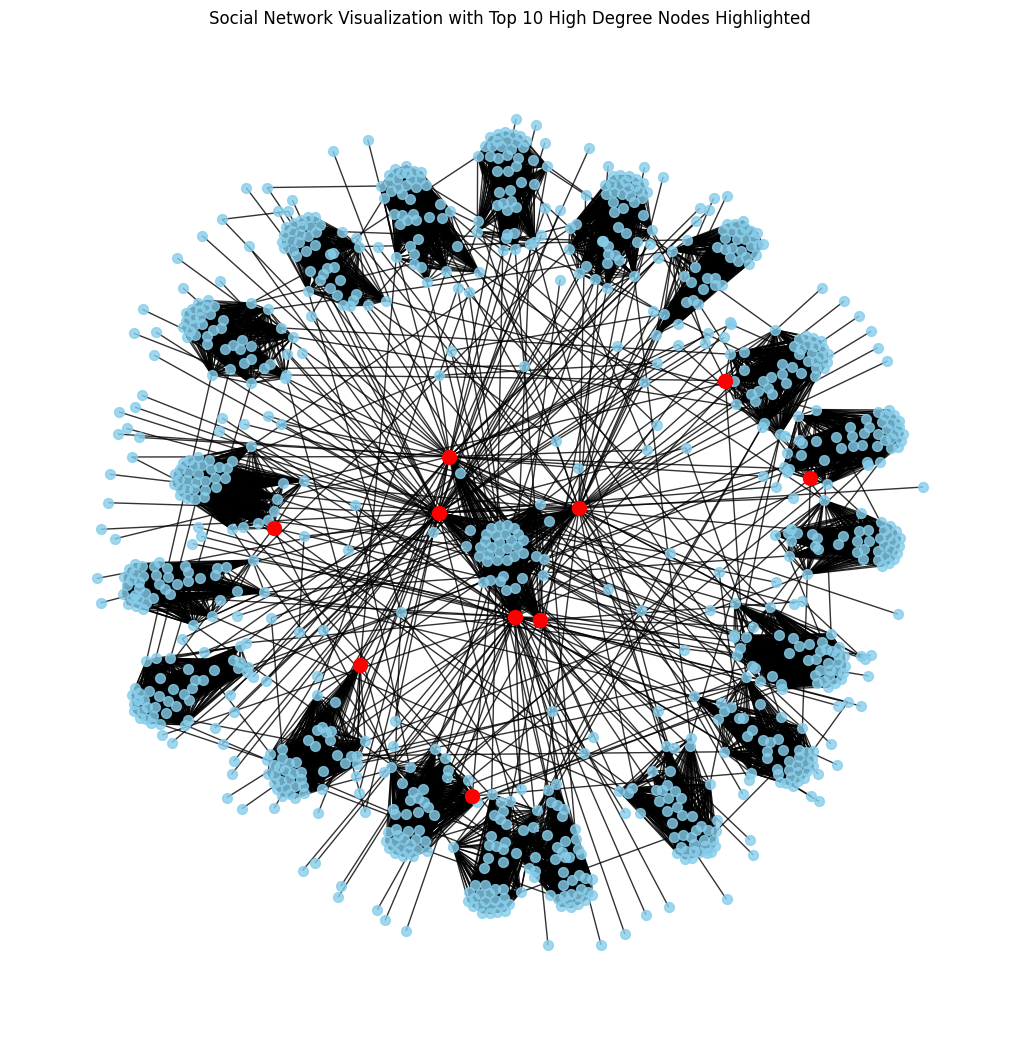

In [46]:
# Compute Degree Centrality
def compute_degree_centrality(graph):
    total_nodes = len(graph)
    degree_centrality = {node: len(neighbors) / (total_nodes - 1) for node, neighbors in graph.items()}
    return degree_centrality

def print_top_degree_nodes(degree_centrality):
    print("\nTop 10 Nodes by Degree Centrality:")
    top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for node, value in top_nodes:
        print(f"Node {node}: {value:.4f}")
    return [node for node, _ in top_nodes]  # Return top nodes for visualization

def visualize_clusters_with_degree_centrality(graph):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    degree_centrality = {node: len(neighbors) for node, neighbors in graph.items()}

    top_10_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

    pos = nx.spring_layout(G, seed=42, center=(0, 0), scale=5, k=0.25)

    plt.figure(figsize=(10, 10))

    nx.draw(G, pos, node_size=50, edge_color="black", node_color="skyblue", alpha=0.8, with_labels=False)

    nx.draw_networkx_nodes(G, pos, nodelist=top_10_nodes, node_size=100, node_color="red")

    plt.title("Social Network Visualization with Top 10 High Degree Nodes Highlighted")
    plt.show()



# Compute Degree Centrality
degree_centrality = compute_degree_centrality(graph)

# Print Top 10 Nodes
top_degree_nodes = print_top_degree_nodes(degree_centrality)


# Visualize Graph with Highlighted Top 10 Nodes

visualize_clusters_with_degree_centrality(graph)


Top 10 Nodes by Closeness Centrality:
Node 629: 0.3590
Node 64: 0.3560
Node 152: 0.3429
Node 545: 0.3339
Node 745: 0.3332
Node 598: 0.3252
Node 978: 0.3251
Node 41: 0.3213
Node 797: 0.3213
Node 24: 0.3212


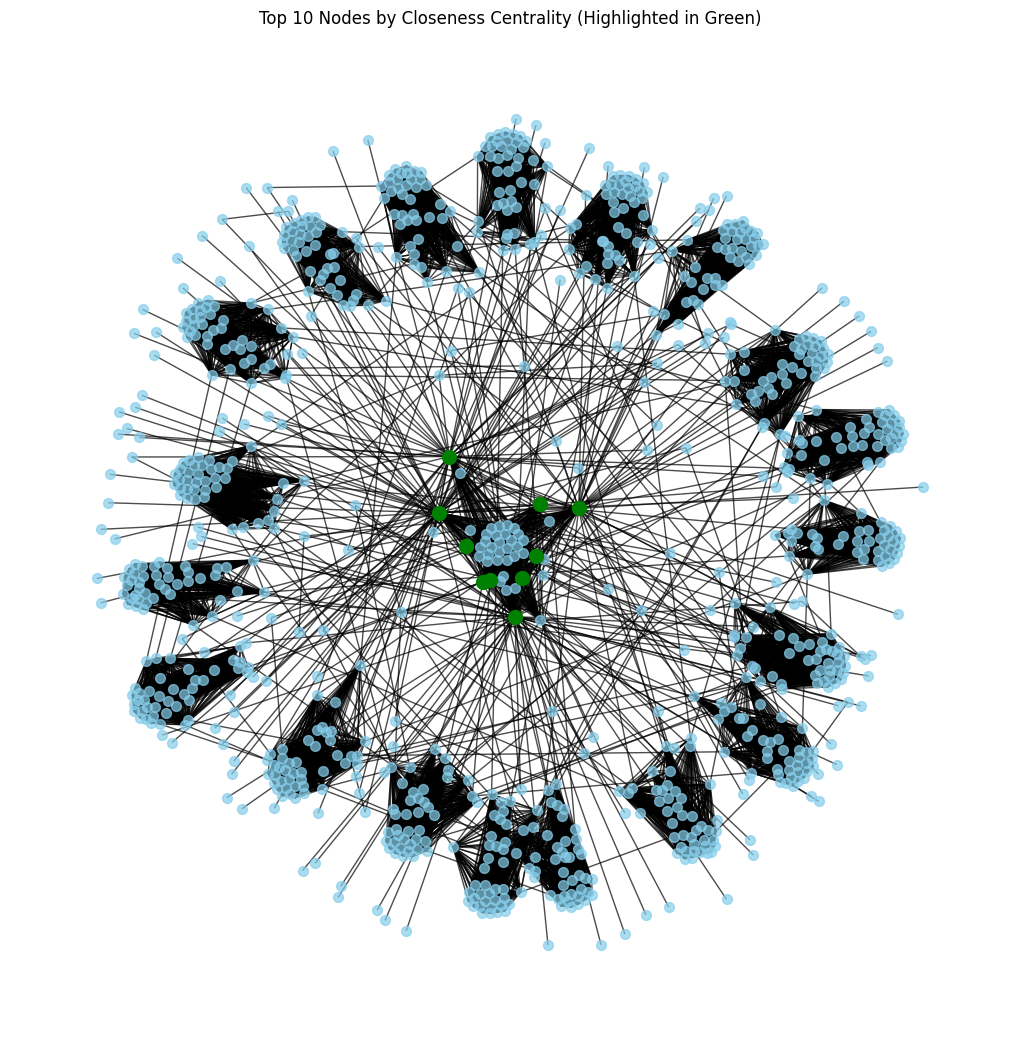

In [47]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Computing shortest path using BFS
def bfs_shortest_path(graph, start_node):

    distances = {node: float('inf') for node in graph}
    distances[start_node] = 0
    queue = deque([start_node])

    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:
            if distances[neighbor] == float('inf'):  # Not visited yet
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)

    return distances

def compute_closeness_centrality(graph):
    total_nodes = len(graph)
    closeness_centrality = {}

    for node in graph:
        shortest_paths = bfs_shortest_path(graph, node)
        total_distance = sum(dist for dist in shortest_paths.values() if dist != float('inf'))

        if total_distance > 0:
            closeness_centrality[node] = (total_nodes - 1) / total_distance
        else:
            closeness_centrality[node] = 0

    return closeness_centrality

def print_top_closeness_nodes(closeness_centrality):
    print("\nTop 10 Nodes by Closeness Centrality:")
    top_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for node, value in top_nodes:
        print(f"Node {node}: {value:.4f}")
    return [node for node, _ in top_nodes]

def visualize_graph_with_closeness(graph, top_nodes):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, seed=42, center=(0, 0), scale=6, k=0.25)

    plt.figure(figsize=(10, 10))

    nx.draw(G, pos, node_size=50, edge_color="black", node_color="skyblue", alpha=0.7, with_labels=False)

    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_size=100, node_color="green")

    plt.title("Top 10 Nodes by Closeness Centrality (Highlighted in Green)")
    plt.show()

# Compute Closeness Centrality
closeness_centrality = compute_closeness_centrality(graph)

# Print Top 10 Nodes
top_closeness_nodes = print_top_closeness_nodes(closeness_centrality)

# Visualize Graph with Highlighted Top 10 Nodes
visualize_graph_with_closeness(graph, top_closeness_nodes)



Top 10 Nodes by Betweenness Centrality:
Node 629: 1.0000
Node 64: 0.8109
Node 152: 0.7450
Node 745: 0.6312
Node 545: 0.2999
Node 279: 0.2823
Node 459: 0.2817
Node 978: 0.2331
Node 940: 0.2265
Node 405: 0.2228


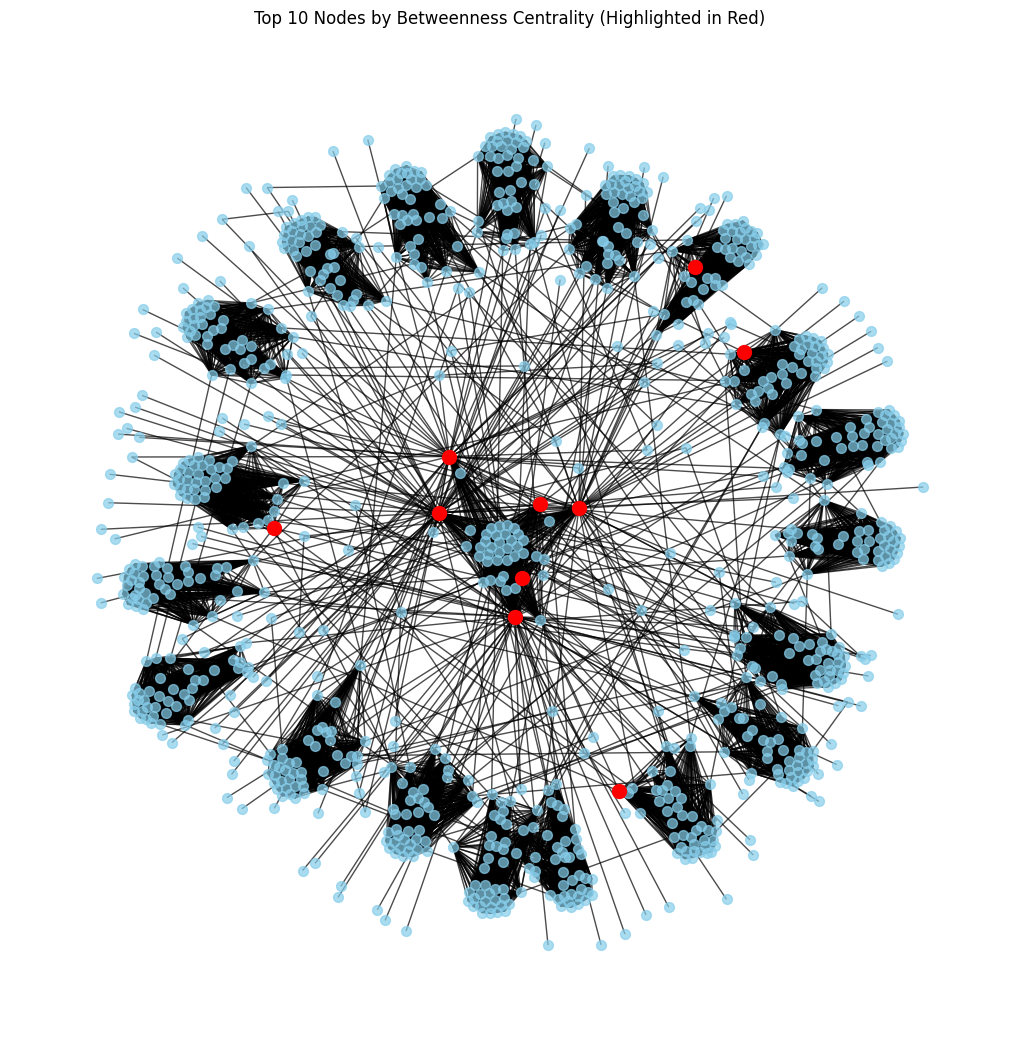

In [48]:
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

def bfs_shortest_paths(graph, start_node):

    queue = deque([start_node])
    shortest_paths = {node: 0 for node in graph}
    shortest_paths[start_node] = 1
    distances = {node: float('inf') for node in graph}
    distances[start_node] = 0
    predecessors = defaultdict(list)

    while queue:
        current = queue.popleft()
        for neighbor in graph[current]:

            if distances[neighbor] == float('inf'):
                distances[neighbor] = distances[current] + 1
                queue.append(neighbor)

            if distances[neighbor] == distances[current] + 1:
                shortest_paths[neighbor] += shortest_paths[current]
                predecessors[neighbor].append(current)

    return shortest_paths, predecessors, distances

def compute_betweenness_centrality(graph):
    betweenness_centrality = {node: 0 for node in graph}

    for start_node in graph:
        shortest_paths, predecessors, distances = bfs_shortest_paths(graph, start_node)

        dependency = {node: 0 for node in graph}
        nodes_in_order = sorted(graph.keys(), key=lambda x: -distances[x])

        for node in nodes_in_order:
            for pred in predecessors[node]:
                dependency[pred] += (shortest_paths[pred] / shortest_paths[node]) * (1 + dependency[node])
            if node != start_node:
                betweenness_centrality[node] += dependency[node]

    max_betweenness = max(betweenness_centrality.values()) or 1
    betweenness_centrality = {node: value / max_betweenness for node, value in betweenness_centrality.items()}

    return betweenness_centrality

def print_top_betweenness_nodes(betweenness_centrality):
    print("\nTop 10 Nodes by Betweenness Centrality:")
    top_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for node, value in top_nodes:
        print(f"Node {node}: {value:.4f}")
    return [node for node, _ in top_nodes]

def visualize_graph_with_betweenness(graph, top_nodes):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, seed=42, center=(0, 0), scale=6, k=0.25)

    plt.figure(figsize=(10, 10))

    nx.draw(G, pos, node_size=50, edge_color="black", node_color="skyblue", alpha=0.7, with_labels=False)

    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_size=100, node_color="red")

    plt.title("Top 10 Nodes by Betweenness Centrality (Highlighted in Red)")
    plt.show()

# Compute Betweenness Centrality
betweenness_centrality = compute_betweenness_centrality(graph)

# Print Top 10 Nodes
top_betweenness_nodes = print_top_betweenness_nodes(betweenness_centrality)

# Visualize Graph with Highlighted Top 10 Nodes
visualize_graph_with_betweenness(graph, top_betweenness_nodes)



Top 10 Nodes by Eigenvector Centrality:
Node 629: 0.0515
Node 152: 0.0512
Node 545: 0.0511
Node 64: 0.0511
Node 745: 0.0509
Node 598: 0.0505
Node 797: 0.0505
Node 41: 0.0504
Node 235: 0.0504
Node 409: 0.0504


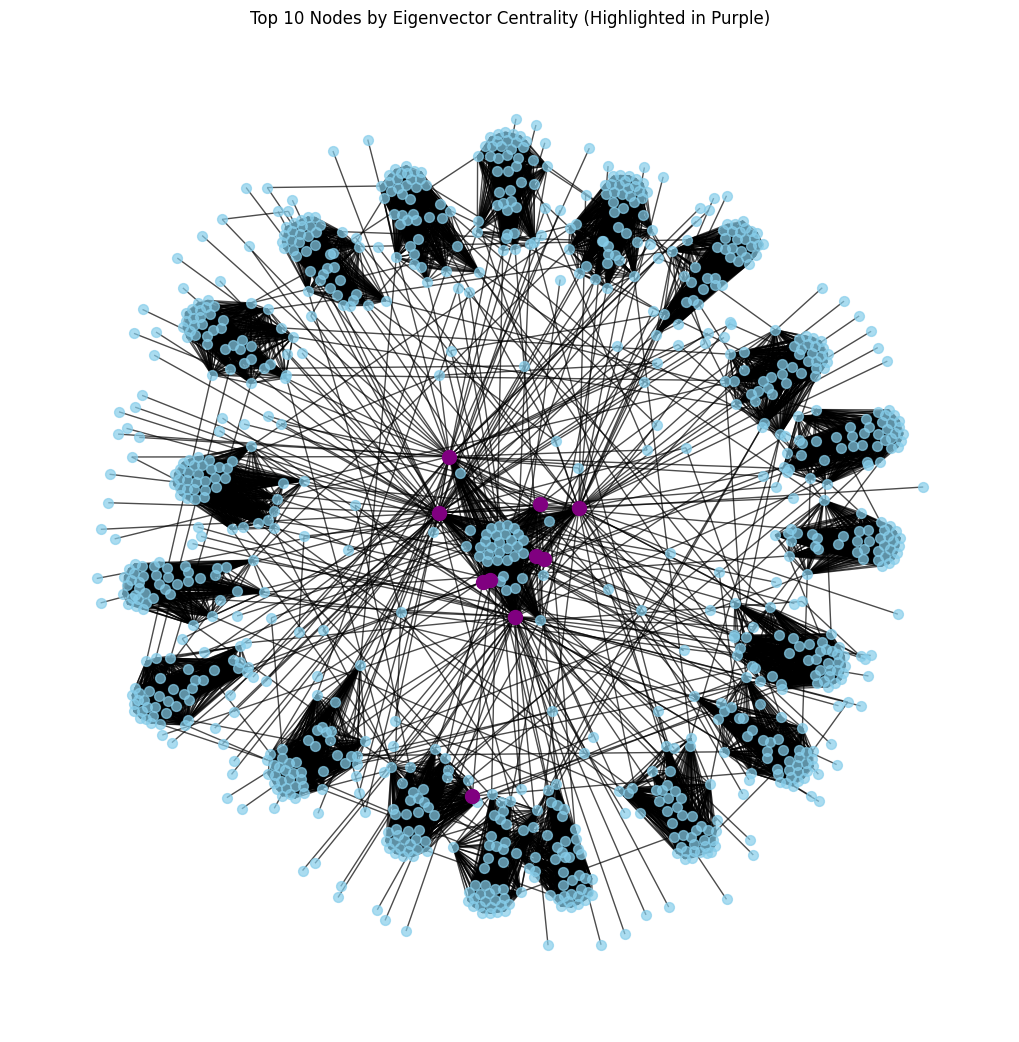

In [49]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def compute_eigenvector_centrality(graph, max_iter=100, tol=1e-6):

    nodes = list(graph.keys())
    n = len(nodes)

    centrality = {node: 1.0 for node in nodes}

    for _ in range(max_iter):
        new_centrality = {node: 0.0 for node in nodes}

        for node in nodes:
            for neighbor in graph[node]:
                new_centrality[node] += centrality[neighbor]

        norm = np.linalg.norm(list(new_centrality.values()))
        if norm == 0:
            break
        for node in nodes:
            new_centrality[node] /= norm

        if sum(abs(new_centrality[node] - centrality[node]) for node in nodes) < tol:
            break
        centrality = new_centrality

    return centrality

def print_top_eigenvector_nodes(eigenvector_centrality):
    print("\nTop 10 Nodes by Eigenvector Centrality:")
    top_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for node, value in top_nodes:
        print(f"Node {node}: {value:.4f}")
    return [node for node, _ in top_nodes]

def visualize_graph_with_eigenvector(graph, top_nodes):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, seed=42, center=(0, 0), scale=6, k=0.25)

    plt.figure(figsize=(10, 10))

    nx.draw(G, pos, node_size=50, edge_color="black", node_color="skyblue", alpha=0.7, with_labels=False)

    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_size=100, node_color="purple")

    plt.title("Top 10 Nodes by Eigenvector Centrality (Highlighted in Purple)")
    plt.show()

# Compute Eigenvector Centrality
eigenvector_centrality = compute_eigenvector_centrality(graph)

# Print Top 10 Nodes
top_eigenvector_nodes = print_top_eigenvector_nodes(eigenvector_centrality)

# Visualize Graph with Highlighted Top 10 Nodes
visualize_graph_with_eigenvector(graph, top_eigenvector_nodes)


Entropy-Based Weights -> w1: 0.266, w2: 0.267, w3: 0.202, w4: 0.265

Top 10 Nodes by Final Centrality Score:
Node 629: 1.0000
Node 64: 0.9144
Node 152: 0.8910
Node 745: 0.8269
Node 545: 0.6489
Node 978: 0.6094
Node 409: 0.5989
Node 457: 0.5841
Node 24: 0.5796
Node 598: 0.5786


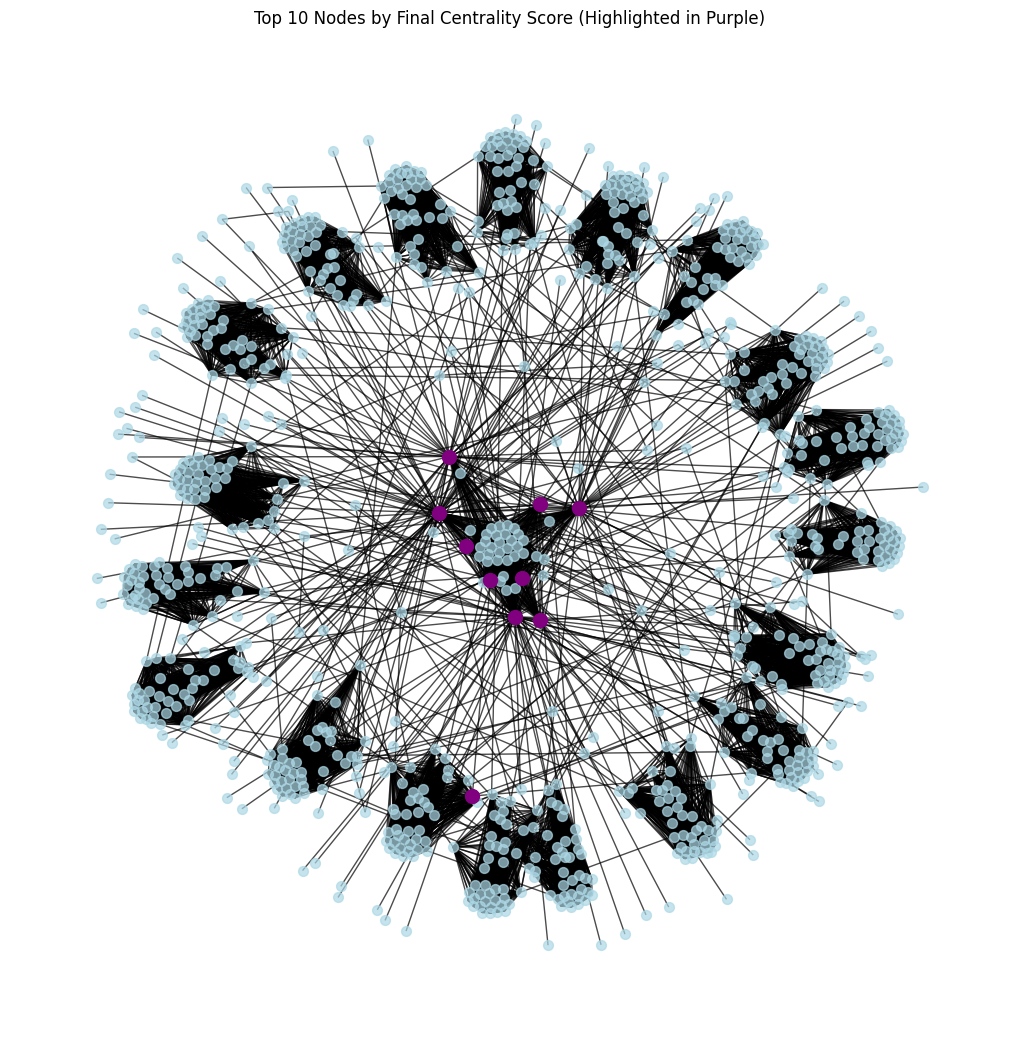

In [50]:
import matplotlib.pyplot as plt
import networkx as nx
import math

def entropy(centrality):
    total = sum(centrality.values())
    probs = [v / total for v in centrality.values() if v > 0]
    return -sum(p * math.log2(p) for p in probs)

def normalize_centrality(centrality):
    min_val, max_val = min(centrality.values()), max(centrality.values())
    return {node: (value - min_val) / (max_val - min_val) if max_val > min_val else 0 for node, value in centrality.items()}

def compute_entropy_weights(graph):
    degree = normalize_centrality(compute_degree_centrality(graph))
    closeness = normalize_centrality(compute_closeness_centrality(graph))
    betweenness = normalize_centrality(compute_betweenness_centrality(graph))
    eigenvector = normalize_centrality(compute_eigenvector_centrality(graph))

    entropy_degree = entropy(degree)
    entropy_closeness = entropy(closeness)
    entropy_betweenness = entropy(betweenness)
    entropy_eigenvector = entropy(eigenvector)

    total_entropy = entropy_degree + entropy_closeness + entropy_betweenness + entropy_eigenvector

    w1 = entropy_degree / total_entropy
    w2 = entropy_closeness / total_entropy
    w3 = entropy_betweenness / total_entropy
    w4 = entropy_eigenvector / total_entropy

    return w1, w2, w3, w4

def compute_final_centrality(graph):
    w1, w2, w3, w4 = compute_entropy_weights(graph)

    degree = normalize_centrality(compute_degree_centrality(graph))
    closeness = normalize_centrality(compute_closeness_centrality(graph))
    betweenness = normalize_centrality(compute_betweenness_centrality(graph))
    eigenvector = normalize_centrality(compute_eigenvector_centrality(graph))

    final_centrality = {
        node: w1 * degree[node] + w2 * closeness[node] + w3 * betweenness[node] + w4 * eigenvector[node]
        for node in graph
    }

    print(f"Entropy-Based Weights -> w1: {w1:.3f}, w2: {w2:.3f}, w3: {w3:.3f}, w4: {w4:.3f}")
    return final_centrality

def print_top_final_centrality_nodes(final_centrality):
    print("\nTop 10 Nodes by Final Centrality Score:")
    top_nodes = sorted(final_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for node, value in top_nodes:
        print(f"Node {node}: {value:.4f}")
    return [node for node, _ in top_nodes]

def visualize_final_centrality(graph, top_nodes):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, seed=42, center=(0, 0), scale=6, k=0.25)

    plt.figure(figsize=(10, 10))

    nx.draw(G, pos, node_size=50, edge_color="black", node_color="lightblue", alpha=0.7, with_labels=False)

    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_size=100, node_color="purple")

    plt.title("Top 10 Nodes by Final Centrality Score (Highlighted in Purple)")
    plt.show()

# Compute Final Centrality
final_centrality = compute_final_centrality(graph)

# Print Top 10 Nodes
top_final_nodes = print_top_final_centrality_nodes(final_centrality)

# Visualize Graph with Highlighted Top 10 Nodes
visualize_final_centrality(graph, top_final_nodes)

Entropy-Based Weights -> α: 0.502, γ: 0.498

Top 10 Nodes by Improved Centrality:
Node 629: 0.5095
Node 64: 0.4647
Node 152: 0.4542
Node 745: 0.4210
Node 545: 0.3273
Node 978: 0.3074
Node 409: 0.3014
Node 457: 0.2951
Node 24: 0.2925
Node 598: 0.2919


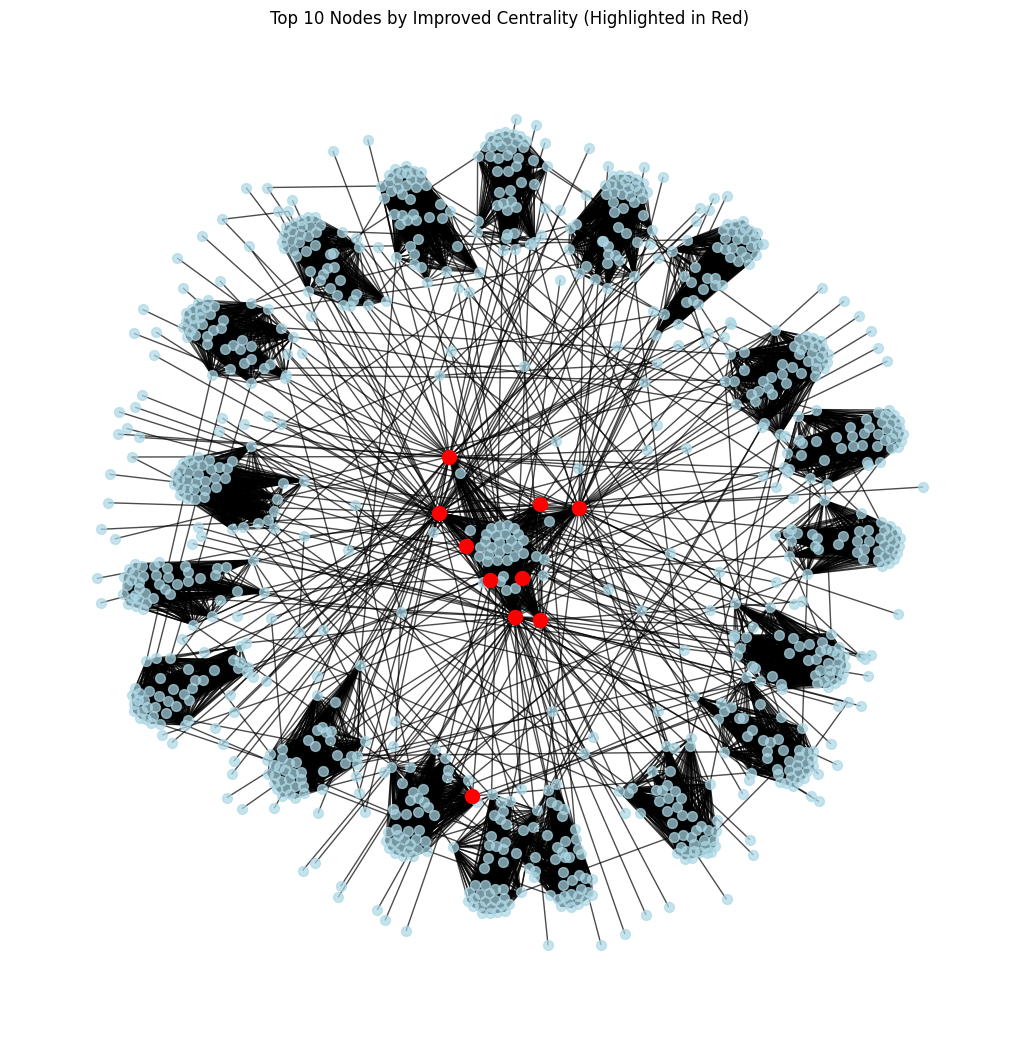

In [51]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

def entropy(data):

    total = sum(data.values())
    probs = [v / total for v in data.values()]
    return -sum(p * math.log2(p) for p in probs if p > 0)

def compute_pagerank(graph, damping=0.85, max_iter=100):
    num_nodes = len(graph)
    ranks = {node: 1 / num_nodes for node in graph}
    out_degree = {node: len(neighbors) for node, neighbors in graph.items()}

    for _ in range(max_iter):
        new_ranks = {}
        for node in graph:
            rank_sum = sum(ranks[neighbor] / out_degree[neighbor] for neighbor in graph[node] if out_degree[neighbor] > 0)
            new_ranks[node] = (1 - damping) / num_nodes + damping * rank_sum

        ranks = new_ranks

    return ranks

pagerank = compute_pagerank(graph)

entropy_final = entropy(final_centrality)
entropy_page = entropy(pagerank)

total_entropy = entropy_final + entropy_page
alpha = entropy_final / total_entropy
gamma = entropy_page / total_entropy

print(f"Entropy-Based Weights -> α: {alpha:.3f}, γ: {gamma:.3f}")

improved_centrality = {
    node: alpha * final_centrality[node] + gamma * pagerank[node]
    for node in graph
}

def print_top_improved_nodes(improved_centrality):
    print("\nTop 10 Nodes by Improved Centrality:")
    top_nodes = sorted(improved_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    for node, value in top_nodes:
        print(f"Node {node}: {value:.4f}")
    return [node for node, _ in top_nodes]

def visualize_improved_centrality(graph, top_nodes):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G, seed=42, center=(0, 0), scale=6, k=0.25)

    plt.figure(figsize=(10, 10))

    nx.draw(G, pos, node_size=50, edge_color="black", node_color="lightblue", alpha=0.7, with_labels=False)

    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_size=100, node_color="red")

    plt.title("Top 10 Nodes by Improved Centrality (Highlighted in Red)")
    plt.show()

# Compute improved centrality
top_improved_nodes = print_top_improved_nodes(improved_centrality)

# Visualize the improved centrality
visualize_improved_centrality(graph, top_improved_nodes)
